Вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные

Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.
Источник - https://karpov.courses/


In [1]:
#Описание данных
#5_task_1:

#id – id клиента в эксперименте
#group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
#events – сколько блюд суммарно было заказано за период

#5_task_2:

#id – id клиента в эксперименте
#segment – сегмент (high/low)
#group – вид кнопки (control – старая версия, test – новая версия)
#events – сколько блюд суммарно было заказано за период

In [2]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test_1 = pd.read_csv('5_task_1.csv')
test_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


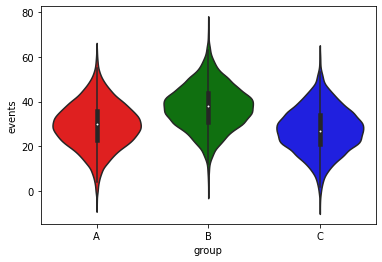

In [4]:
sns.violinplot(x="group", y="events", data=test_1, palette=["r", "g", "b"])

In [5]:
test_2 = pd.read_csv('5_task_2.csv')
test_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [6]:
# Чтобы проверить какой формат фотографий (всего 3) блюд является наилучшим, 
# т.е. в какой из групп в среднем покупали больше всего, воспользуемся ANOVA тестом

In [7]:
# С помощью теста Левена проверим являются ли дисперсии внутри групп примерно одинаковыми

pg.homoscedasticity(data = test_1, dv = 'events', group = 'group', method = 'levene', alpha = 0.05 )

,W,pval,equal_var
levene,2.26226,0.104133,True


In [8]:
# p-value теста Левена больше заданного уровня значимости 0.05,
# нулевая гипотеза о гомогенности дисперсий внутри групп не может быть отвергнута

In [9]:
# Проверим нормальность распредления данных 
pg.normality(data = test_1, dv = 'events', group = 'group', method="normaltest")

# p-value > 0.05 => данные во всех группах распределены нормально

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


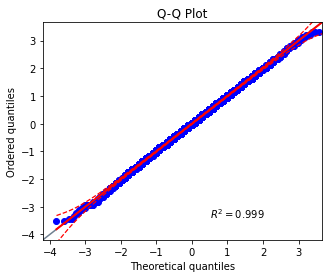

In [10]:
pg.qqplot(test_1.query('group == "A"').events)

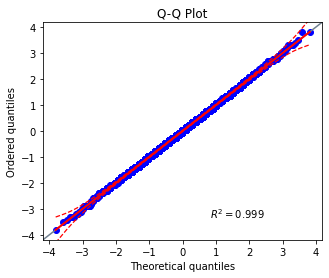

In [11]:
pg.qqplot(test_1.query('group == "B"').events)

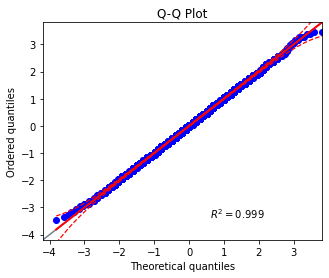

In [12]:
pg.qqplot(test_1.query('group == "C"').events)

In [13]:
# Проведем anova тест Уэлча
pg.welch_anova(data = test_1, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,19996.209267,2924.792424,0.0,0.161377


In [14]:
# anova тест плказал, что среди исследуемых групп действительно есть различия
# используем критерий Тьюки, чтобы определить между какими группами есть различия

In [15]:
pg.pairwise_tukey(data = test_1, dv = 'events', between = 'group')

# Группа B дает наибольший прирост в заказх. Между группами B и C наблюдаются наибольшие различия

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


Text(0, 0.5, 'Число покупок')

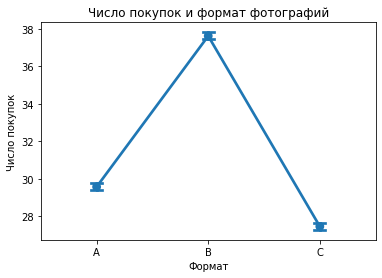

In [16]:
# нарисуем для наглядности
sns.pointplot(x = 'group', y = 'events', data = test_1, capsize = 0.1)
plt.title('Число покупок и формат фотографий')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

In [17]:
# На графике видно, что фотографии группы B - квадратные дает наибольший прирост в заказах.

In [18]:
# Проведем второй эксперимент - как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [19]:
# Посмотрим на распределение данных в контрольных группах 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


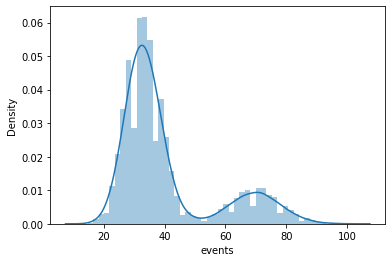

In [20]:
test = test_2.query('group == "test"')
sns.distplot(test.events)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


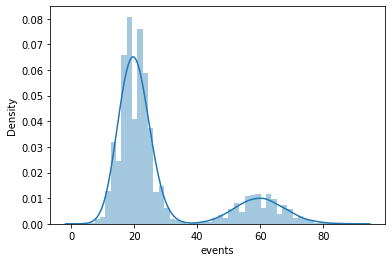

In [21]:
control = test_2.query('group == "control"')
sns.distplot(control.events)

In [22]:
# Посмотрим описательную статистику events в разбивке по группе и по сегменту пользователя

test_2.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [23]:
pg.anova(data=test_2, dv="events", between=["group", "segment"], ss_type=2)

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [29]:
#  используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия
test_2["combination"] = test_2["group"] + " / " + test_2["segment"]

In [31]:
pg.pairwise_tukey(data = test_2, dv = 'events', between = 'combination')


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


Text(0, 0.5, 'Число покупок')

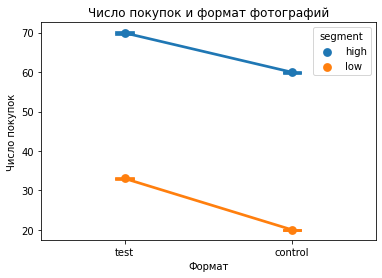

In [34]:
# нарисуем для наглядности
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = test_2, capsize = 0.1)
plt.title('Число покупок и формат фотографий')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

In [ ]:
# Факторы group, segment а также их взаимодествия оказались значимы. 
# Судя по графику для всех групп среднее значение events увеличилось, поэтому стоит принять решение о введении новой вресии кнопки заказа.
